# **Transformers**

## A machine-learning model built to handle sequences (e.g., sentences, time series).

## Learns relationships between all parts of a sequence at once.


---


# **Why Transformers Are So Powerful ?**

##**- Long-Range Understanding:**
###*By the connections between distant elements*

##**- Speed:**
###*Full-sequence processing is highly parallelizable*

##**- Versatility:**
###*Beyond text—used in images (Vision Transformers), audio, DNA sequences, and more*



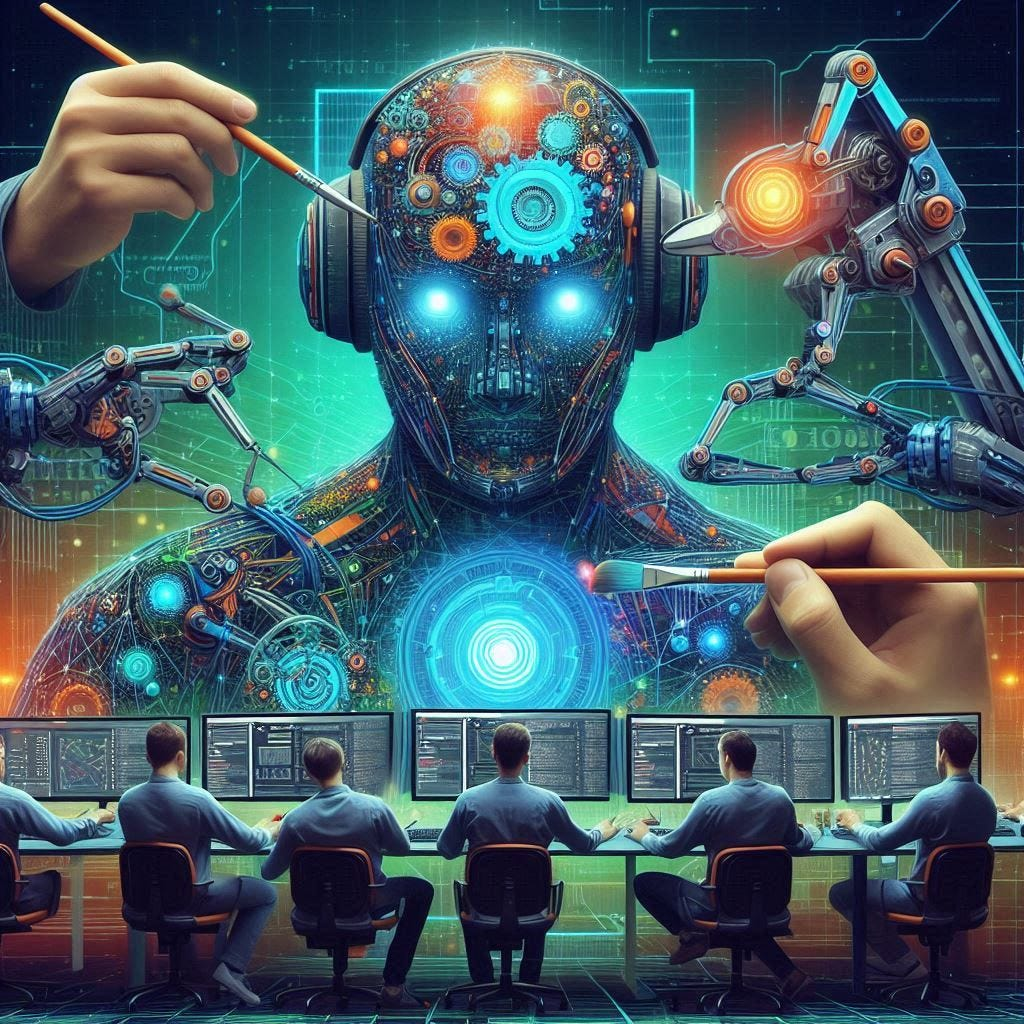

# **Why Older Models Struggled ?**

## Older Models, such as Recurrent Neural Networks (RNNs) go one element at a time, making them slow. Additionally, important info far back in the sequence often gets “lost”.

# **By using Transformers:**

## **1- Parallel Processing:**

## Looks at the whole sequence together → much faster.

## **2- Self-Attention Mechanism:**

## Weighs how much every part of the input matters to every other part

## Furthermore, it lets the model “focus” on the most relevant bits, no matter where they are.



---

# How Transformers Works ?

## **1- Embedding the Iputs:**
### *Converts each item (e.g., word) into a vector of numbers*

## **2- Positional Encoding:**
### *Adds a little signal to each vector so the model knows the order (1st, 2nd, 3rd…).*

## **3- Self-Attention Layers:**

### - *Computes importance scores between every pair of vectors.*

### - *Multiple “heads” per layer look at different relationships (grammar, meaning, etc.).*

## **4- Stacking Layers:**
### *Each layer refines the understanding from the layer below.*

## **5- Output Generation:**

### *Produces the final sequence: translation, summary, next-word prediction, etc.*



---

# **Common Applications**

##**Language:** GPT, BERT by generate, summarize, translate, answer questions

##**Vision:** Image recognition, object detection

##**Time Series:** Stock forecasting, weather prediction, signal analysis

In [1]:
! pip install transformers



---


# **Hugging Face Transformers Library**

##A collection of ready-made (“pre-trained”) models for NLP (natural language processing) tasks that cover *classifying text*, *translating languages*, *answering questions*, and more

## By using this Library, we don’t need to train huge models from scratch, and one consistent API works across dozens of different model types.

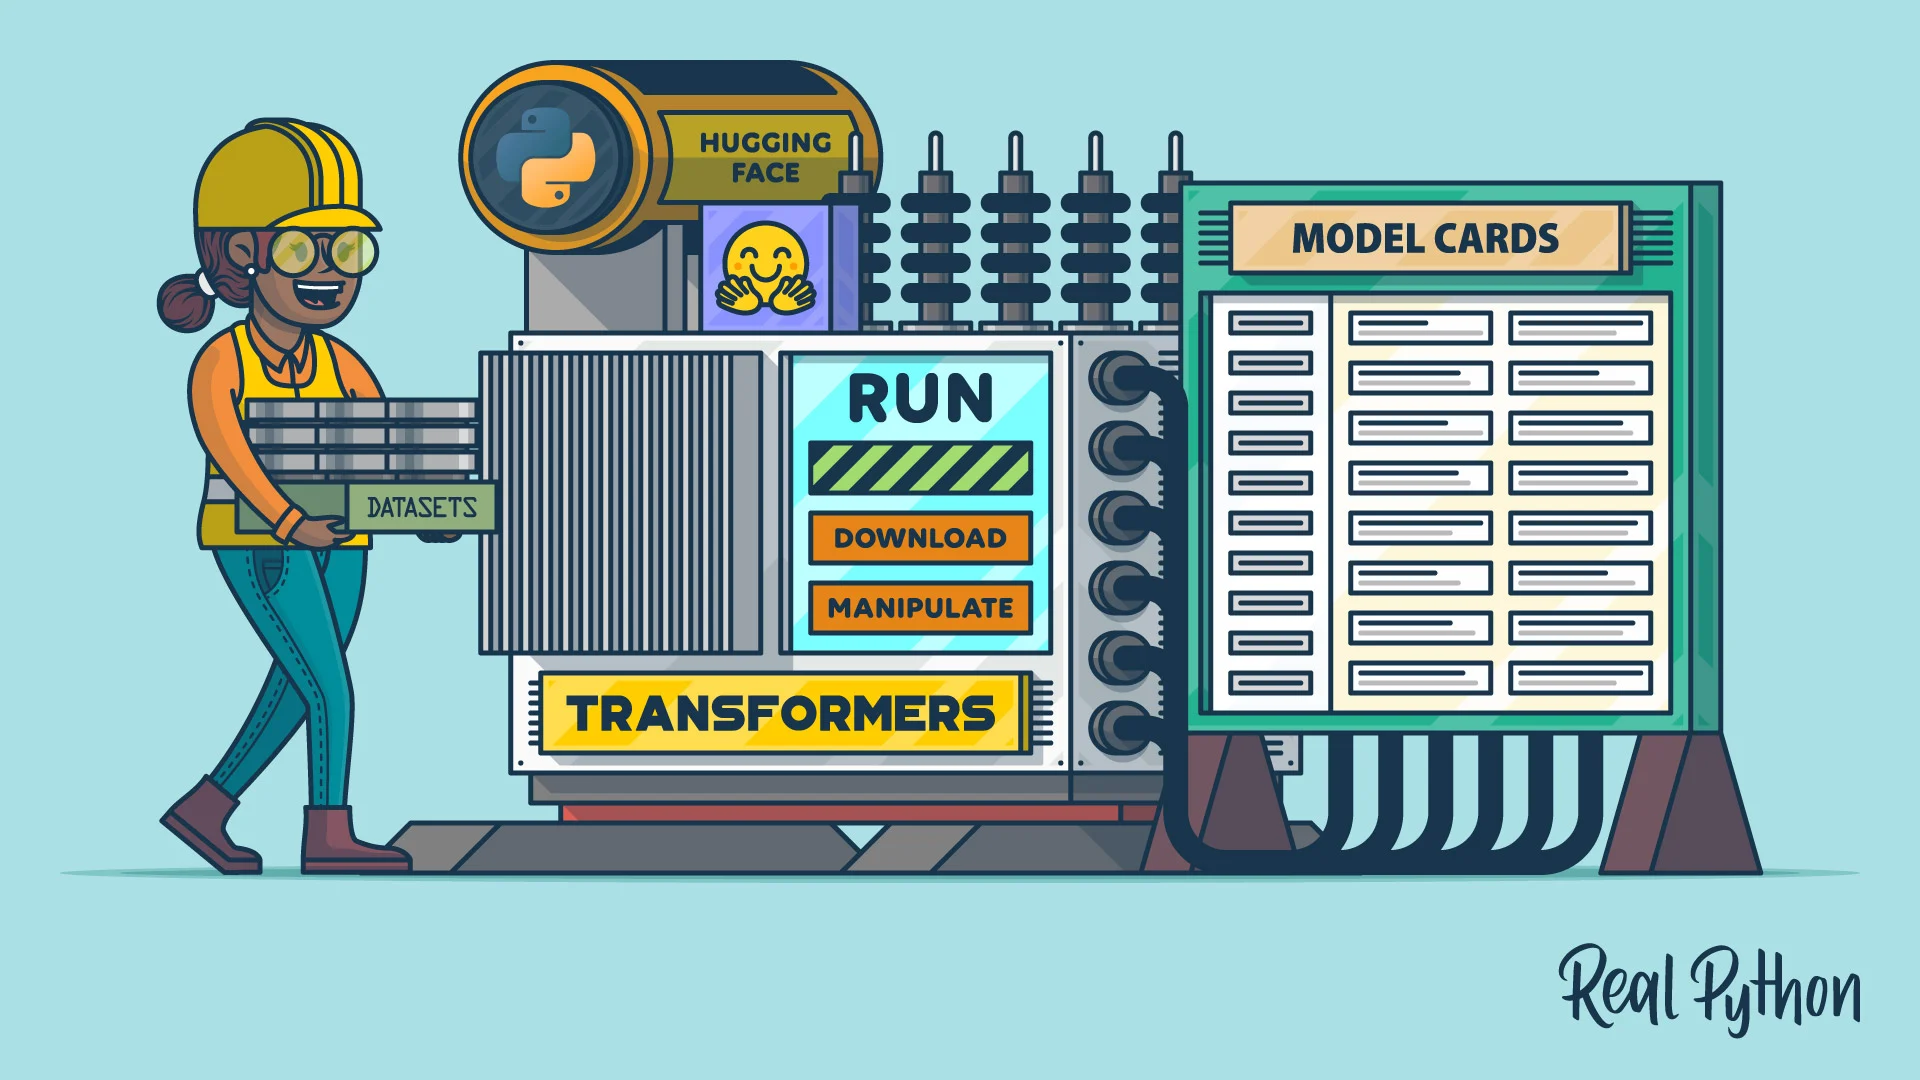

In [2]:
from transformers import pipeline



---


# The `pipeline()` Function

## A “one-stop” shortcut to grab a pre-trained model and start using it right away

## It hides all the setup details so you can focus on your task




---

# **How It Works ?**


##1- Downloads the appropriate pre-trained model automatically

##2- Configures it for you behind the scenes

##3- Returns a simple object you can call on your text

In [4]:
classifier1 = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu




---

## If we call the `pipeline()` with no Model argument, Transformers will pick `distilbert/distilbert-base-uncased-finetuned-sst-2-english`

## **BERT** stands for *Bidirectional Encoder Representations from Transformers*. It’s a landmark model in NLP that helped kick off the current era of “pre-trained transformer” models.

## **DistilBERT** is a smaller, faster version of BERT.

## It is trained to tell if English sentences are positive or negative.

## It is used because a default sentiment model won’t work for e.g. translation or question-answering


---


## In `distilbert/distilbert-base-uncased-finetuned-sst-2-english`:

###**`DistilBERT`**

###*A “student” version of BERT that’s ~40% smaller and faster*

###*Learned by mimicking a larger BERT “teacher” via knowledge distillation*

###**`Base`**

###*The “medium” size configuration (fewer layers/parameters than “large” models)*

###**`Uncased`**

###*Ignores letter casing (treats “Apple” = “apple”) to simplify the vocabulary*

###**`Finetuned`**

###*Pre-trained DistilBERT that’s been further trained on a labeled dataset for a specific task*

##**`SST-2-English`**

###*The fine-tuning dataset is the Stanford Sentiment Treebank v2 (movie reviews labeled positive/negative), and it is tailored to English sentiment analysis*

In [6]:
result = classifier1("I love using transformers for NLP tasks!")
print(result)

[{'label': 'POSITIVE', 'score': 0.9982925057411194}]


In [9]:
# Create a text classification pipeline using FinBERT
classifier2 = pipeline("text-classification", model="yiyanghkust/finbert-tone")

# Classify a piece of financial text
text1 = "The company's quarterly earnings exceeded analysts' expectations, leading to a surge in stock prices."
result = classifier2(text1)

# Print the classification result
print(result)

Device set to use cpu


[{'label': 'Positive', 'score': 1.0}]




---

# In `yiyanghkust/finbert-tone`:

##  A BERT variant pre-trained on billions of words of **financial text**.
##  Further trained on 10,000 sentences from analyst reports that someone manually labeled as **positive**, **negative**, or **neutral tone**.
## Using for **earnings-call analysis**, **news-alert systems**, or **automated report scanning**.

In [11]:
from transformers import pipeline

# Create a text classification pipeline using the fine-tuned DistilBERT model
classifier3 = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

# Classify a piece of text
text = "The movie was fantastic and exceeded all expectations!"
result = classifier3(text)

# Print the classification result
print(result)

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998776912689209}]




---
# **Score in Pipeline Outputs**

## This score is a “confidence” value indicating how sure the model is about its prediction (*similar to probability for each possible label*).

## This socre is always between 0 and 1 which 0 shows the "**no confidence**" and 1 demonstrates the "**complete confidence**"

## The range of this Score is:

1. High Score (e.g., > 0.9): The model is very sure

2. Moderate Score (e.g., 0.5–0.8): The model sees some ambiguity

3. Low Score (e.g., < 0.5): Model is unsure, so consider reviewing the input or using a different model/task




---
# **Text Classification**

## Classifying text into labels without having trained on those labels beforehand.

## The model uses its pre-trained language to make predictions without seeing any labeled examples of the new categories.

# **Key Characteristics**

##**1. No Training on Target Classes:**

###*The model is not trained with labeled examples of the target classes.*

##**2. Leverages Semantic Understanding:**
###*It uses the semantic meaning of labels and the relationships captured during pre-training (e.g., through natural language inference tasks).*

##**3. Auxiliary Information:**
###*The model relies on auxiliary information, such as semantic descriptions, attributes, or relationships, to infer the new classes.*


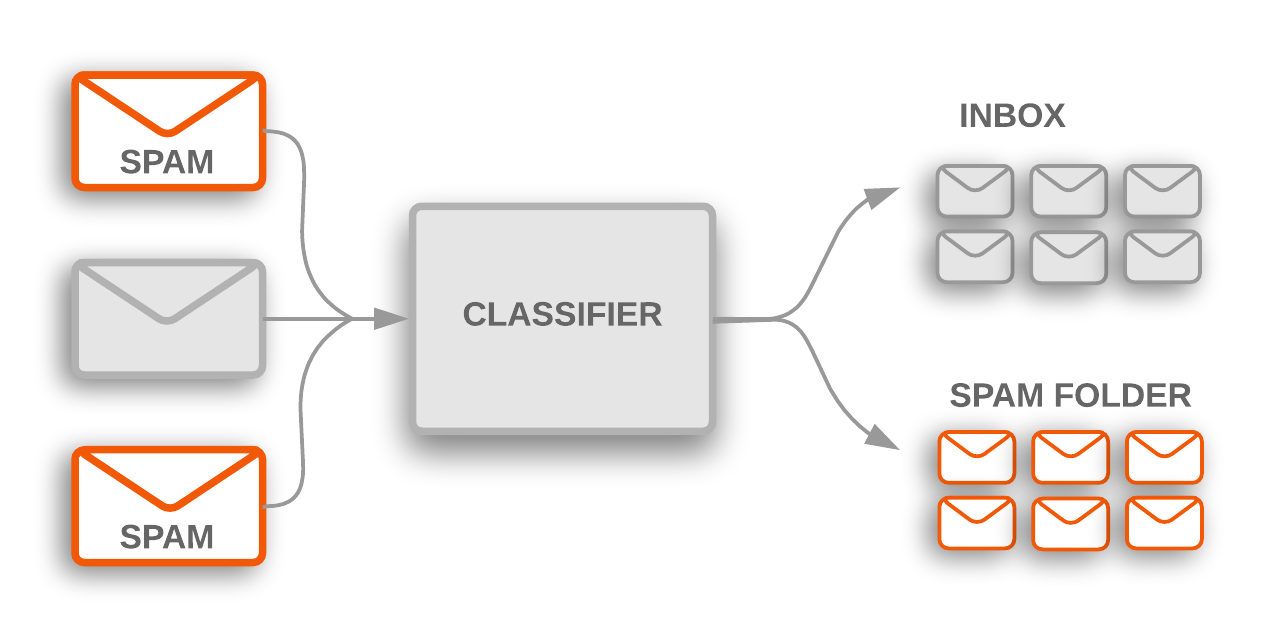

In [ ]:
text3="In recent weeks, the stock market has experienced significant volatility due to various economic indicators and geopolitical events. Investors are closely watching the Federal Reserve's monetary policy decisions, as any change in interest rates could impact market dynamics. Tech stocks have shown resilience despite the broader market downturn, driven by strong earnings reports from leading companies. However, concerns about supply chain disruptions and rising inflation continue to create uncertainty. Many analysts are advising caution, suggesting that diversification is key to mitigating risk. Meanwhile, energy stocks have benefited from increasing oil prices, reflecting growing global demand. On the other hand, retail stocks have faced challenges due to changing consumer behavior and increased competition from e-commerce giants. The upcoming earnings season will be critical for assessing the market's direction, as companies report their financial performance and outlook. Overall, while opportunities for growth remain, investors should be prepared for potential market corrections."



---


# **Zero-Shot Classifier**

## A Huggig Face Pipeline which takes the input text and the set of candidate labels.

## Candidate labels is alist of strings defining the possible categories and tells the Model ***“these are the labels you can choose from”***

## The Output of this classifier is a Dictionary which contains:
- **`sequence:`** the original input text

- **`labels:`** a ranked list of the candidate labels the model predicts

- **`scores:`** the model’s confidence for each label (0–1)


In [ ]:
# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")



# Define categories (labels) for classification
categories = [
    "Volatility",
    "Economic Policy",
    "Tech Stocks",
    "Inflation and Supply Chain",
    "Energy Stocks",
    "Retail Stocks",
    "Market Outlook",
]

# Split text into sentences for classification
sentences = text3.split(". ") #This line splits a block of text (text3) into individual sentences, assuming that each sentence ends with a period (.) followed by a space.

# Perform classification for each sentence
results = []
for sentence in sentences:
    if sentence.strip():  # Check for non-empty sentences ,If the sentence contains any meaningful content after stripping, the condition evaluates as True and proceeds to classify it.
        result = classifier(sentence, candidate_labels=categories)
        results.append((sentence, result['labels'], result['scores'])) #Stores the classification results for the current sentence in the results list. Each entry in results is a tuple containing: The sentence. The predicted labels (categories). The scores (confidence levels for the labels).

results

Device set to use cpu


[('In recent weeks, the stock market has experienced significant volatility due to various economic indicators and geopolitical events',
  ['Volatility',
   'Market Outlook',
   'Economic Policy',
   'Retail Stocks',
   'Inflation and Supply Chain',
   'Energy Stocks',
   'Tech Stocks'],
  [0.8371774554252625,
   0.07385455071926117,
   0.031046947464346886,
   0.019964341074228287,
   0.014371711760759354,
   0.012538660317659378,
   0.01104635838419199]),
 ("Investors are closely watching the Federal Reserve's monetary policy decisions, as any change in interest rates could impact market dynamics",
  ['Volatility',
   'Market Outlook',
   'Economic Policy',
   'Inflation and Supply Chain',
   'Retail Stocks',
   'Energy Stocks',
   'Tech Stocks'],
  [0.29092171788215637,
   0.2874884307384491,
   0.12722021341323853,
   0.11484083533287048,
   0.08240862935781479,
   0.05460032820701599,
   0.04251987859606743]),
 ('Tech stocks have shown resilience despite the broader market downtur

In [ ]:
resultwholeText = classifier(text3, candidate_labels=categories)
resultwholeText

{'sequence': "In recent weeks, the stock market has experienced significant volatility due to various economic indicators and geopolitical events. Investors are closely watching the Federal Reserve's monetary policy decisions, as any change in interest rates could impact market dynamics. Tech stocks have shown resilience despite the broader market downturn, driven by strong earnings reports from leading companies. However, concerns about supply chain disruptions and rising inflation continue to create uncertainty. Many analysts are advising caution, suggesting that diversification is key to mitigating risk. Meanwhile, energy stocks have benefited from increasing oil prices, reflecting growing global demand. On the other hand, retail stocks have faced challenges due to changing consumer behavior and increased competition from e-commerce giants. The upcoming earnings season will be critical for assessing the market's direction, as companies report their financial performance and outlook.

In [ ]:
# Print the classification results
for sentence, labels, scores in results:
    print(f"Text: {sentence.strip()}\nPredicted Category: {labels[0]} (Confidence: {scores[0]:.2f})\n")

Text: In recent weeks, the stock market has experienced significant volatility due to various economic indicators and geopolitical events
Predicted Category: Volatility (Confidence: 0.84)

Text: Investors are closely watching the Federal Reserve's monetary policy decisions, as any change in interest rates could impact market dynamics
Predicted Category: Volatility (Confidence: 0.29)

Text: Tech stocks have shown resilience despite the broader market downturn, driven by strong earnings reports from leading companies
Predicted Category: Tech Stocks (Confidence: 0.97)

Text: However, concerns about supply chain disruptions and rising inflation continue to create uncertainty
Predicted Category: Inflation and Supply Chain (Confidence: 0.73)

Text: Many analysts are advising caution, suggesting that diversification is key to mitigating risk
Predicted Category: Volatility (Confidence: 0.27)

Text: Meanwhile, energy stocks have benefited from increasing oil prices, reflecting growing global de